#### MakeMore Transformer

Inspired by Andrej Karpathy's Neural Network Training.

In [1]:
words=open('names.txt','r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(x) for x in words)

2

In [5]:
max(len(x) for x in words)

15

In [6]:
b={}
for w in words:
    chs=['<S>']+ list(w)+['</E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1

In [7]:
b.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '</E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '</E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '</E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'),

In [8]:
sorted(b.items(), key = lambda kv:-kv[1])

[(('n', '</E>'), 6763),
 (('a', '</E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '</E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '</E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '</E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '</E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 147

In [9]:
import torch

In [24]:
N=torch.zeros((27,27), dtype=torch.int32)

In [30]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [31]:
for w in words:
    chs=['.']+ list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1

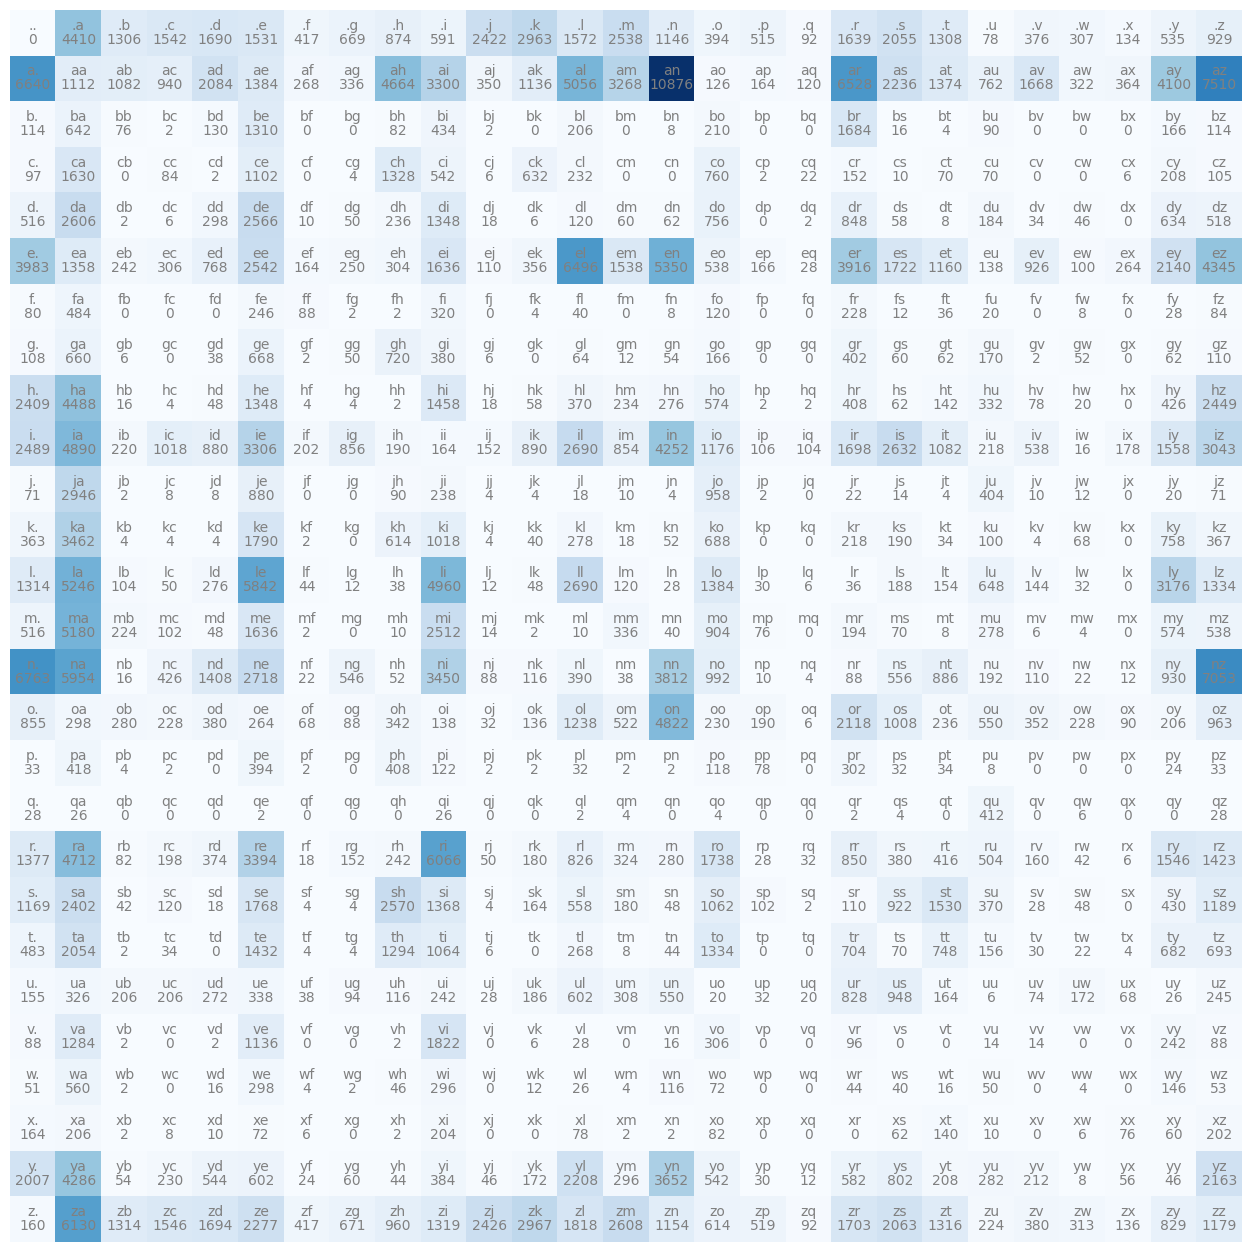

In [60]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr=itos[i]+itos[j]
        plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray')
plt.axis('off')
plt.show()




In [34]:
N[0,:].shape

torch.Size([27])

In [43]:
p=N[0].float()
p=p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [53]:
g=torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]

'c'

In [37]:
g=torch.Generator().manual_seed(217283782873)
p=torch.rand(3,generator=g)
p=p/p.sum()
p

tensor([0.5495, 0.2620, 0.1885])

In [38]:
torch.multinomial(p,num_samples=100,replacement=True,generator=g)

tensor([0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1,
        2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 0])

In [78]:
P=(N+1).float()
P=P/P.sum(1,keepdim=True)

In [79]:
g=torch.Generator().manual_seed(2147483647)

for i in range(5):
    ix=0
    out=[]
    while True:
        p=P[ix]
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

cexzmazjallurailezkaynnellzimittain.
llaynzkanza.
stazthubrtthrigotai.
mozjellavo.
ke.


In [80]:
log_likelihood=0.0
n=0
for w in words:
    chs=['.']+ list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        log_prob=torch.log(prob)
        log_likelihood+=log_prob
        n+=1
print(f'{log_likelihood=}')
nll=-log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-580931.5625)
nll=tensor(580931.5625)
2.5463149547576904


In [87]:
# creating training set for bigrams(x,y)

xs,ys=[],[]

for w in words[:1]:
    chs=['.']+ list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs=torch.tensor(xs)
ys=torch.tensor(ys)

. e
e m
m m
m a
a .


In [88]:
xs

tensor([ 0,  5, 13, 13,  1])

In [89]:
ys

tensor([ 5, 13, 13,  1,  0])

In [85]:
import torch.nn.functional as F

In [94]:
xenc=F.one_hot(xs,num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [95]:
xenc.shape

torch.Size([5, 27])

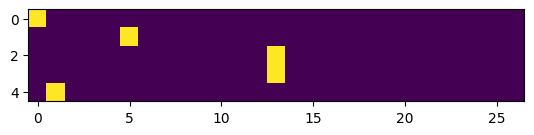

In [96]:
plt.imshow(xenc)

In [97]:
xenc.dtype

torch.float32

In [100]:
# Creating out first neuron

W=torch.randn(27,27)
# Matrix Multiplication of one hot encoded X and Weight of the neuron
xenc @ W

tensor([[ 0.5105, -0.8680,  0.9196,  0.4997, -0.1969, -0.2854,  0.0739, -0.5953,
          0.4044,  0.5788,  0.5917, -0.5586, -0.8283,  1.0011,  0.3879, -0.4869,
         -0.3384, -0.1209, -0.1101,  0.7935, -1.7478, -1.0332,  1.0233,  1.9021,
         -0.4970,  0.8928,  1.1385],
        [-0.3471, -0.3490, -0.8935,  0.7170, -0.6788, -0.1254, -0.9104,  1.3798,
         -1.7845, -0.3604, -0.8492,  0.1327,  0.2653, -1.8188,  0.5782,  0.3375,
         -0.3150,  1.2587, -1.2993,  1.3056, -0.1632, -0.0692, -0.6885, -1.2144,
          1.7915,  0.0908, -0.5387],
        [ 0.0881,  1.1047, -1.5407,  0.1419, -0.1242, -0.0783, -0.4970, -0.5339,
         -1.7428,  0.1012, -0.3921, -1.0478,  0.1792, -0.2339, -0.3640,  0.2457,
         -1.4107,  0.7815,  1.8201,  0.8880, -0.3711, -0.3718,  0.3854, -0.5838,
          1.5046,  0.5279, -2.0178],
        [ 0.0881,  1.1047, -1.5407,  0.1419, -0.1242, -0.0783, -0.4970, -0.5339,
         -1.7428,  0.1012, -0.3921, -1.0478,  0.1792, -0.2339, -0.3640,  0.2457

In [103]:
(xenc @ W).shape

torch.Size([5, 27])

In [104]:
logits=xenc @ W
counts = logits.exp()
probs=counts/counts.sum(1,keepdims=True)
probs

tensor([[0.0404, 0.0102, 0.0608, 0.0400, 0.0199, 0.0182, 0.0261, 0.0134, 0.0363,
         0.0433, 0.0438, 0.0139, 0.0106, 0.0660, 0.0357, 0.0149, 0.0173, 0.0215,
         0.0217, 0.0536, 0.0042, 0.0086, 0.0675, 0.1624, 0.0148, 0.0592, 0.0757],
        [0.0201, 0.0200, 0.0116, 0.0582, 0.0144, 0.0251, 0.0114, 0.1129, 0.0048,
         0.0198, 0.0122, 0.0324, 0.0370, 0.0046, 0.0507, 0.0398, 0.0207, 0.1000,
         0.0077, 0.1048, 0.0241, 0.0265, 0.0143, 0.0084, 0.1704, 0.0311, 0.0166],
        [0.0307, 0.0850, 0.0060, 0.0324, 0.0249, 0.0260, 0.0171, 0.0165, 0.0049,
         0.0312, 0.0190, 0.0099, 0.0337, 0.0223, 0.0196, 0.0360, 0.0069, 0.0615,
         0.1738, 0.0684, 0.0194, 0.0194, 0.0414, 0.0157, 0.1268, 0.0477, 0.0037],
        [0.0307, 0.0850, 0.0060, 0.0324, 0.0249, 0.0260, 0.0171, 0.0165, 0.0049,
         0.0312, 0.0190, 0.0099, 0.0337, 0.0223, 0.0196, 0.0360, 0.0069, 0.0615,
         0.1738, 0.0684, 0.0194, 0.0194, 0.0414, 0.0157, 0.1268, 0.0477, 0.0037],
        [0.0353, 0.0428,

In [105]:
probs.shape

torch.Size([5, 27])

In [107]:
nlls=torch.zeros(5)
for i in range(5):
    # i-th bigram
    x=xs[i].item()
    y=ys[i].item()
    print('-----------')
    
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('Input to neural net:',x)
    print('Output probablities from neural net:',probs[i])
    print('label ( Actual Next Character):',y)
    p=probs[i,y]
    
    print('Probability assigned by the neural net to the correct character:', p.item())
    logp=torch.log(p)
    print('log likelihood:', logp.item())
    nll=-logp
    print('Negative Log Likelihood', nll.item())
    nlls[i]=nll

print('======')
print('Average Negative Likelihood i.e, loss =', nlls.mean().item())
    

-----------
bigram example 1: .e (indexes 0,5)
Input to neural net: 0
Output probablities from neural net: tensor([0.0404, 0.0102, 0.0608, 0.0400, 0.0199, 0.0182, 0.0261, 0.0134, 0.0363,
        0.0433, 0.0438, 0.0139, 0.0106, 0.0660, 0.0357, 0.0149, 0.0173, 0.0215,
        0.0217, 0.0536, 0.0042, 0.0086, 0.0675, 0.1624, 0.0148, 0.0592, 0.0757])
label ( Actual Next Character): 5
Probability assigned by the neural net to the correct character: 0.01822695881128311
log likelihood: -4.00485372543335
Negative Log Likelihood 4.00485372543335
-----------
bigram example 2: em (indexes 5,13)
Input to neural net: 5
Output probablities from neural net: tensor([0.0201, 0.0200, 0.0116, 0.0582, 0.0144, 0.0251, 0.0114, 0.1129, 0.0048,
        0.0198, 0.0122, 0.0324, 0.0370, 0.0046, 0.0507, 0.0398, 0.0207, 0.1000,
        0.0077, 0.1048, 0.0241, 0.0265, 0.0143, 0.0084, 0.1704, 0.0311, 0.0166])
label ( Actual Next Character): 13
Probability assigned by the neural net to the correct character: 0.0046096